In [3]:
from google.colab import data_table

data_table.enable_dataframe_formatter()

In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24 Introduction to EDA/bigmart.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.memory_usage(deep = True)

Index                           128
Item_Identifier              528426
Item_Weight                   68184
Item_Fat_Content             543424
Item_Visibility               68184
Item_Type                    582616
Item_MRP                      68184
Outlet_Identifier            536949
Outlet_Establishment_Year     68184
Outlet_Size                  457987
Outlet_Location_Type         536949
Outlet_Type                  626370
Item_Outlet_Sales             68184
dtype: int64

In [11]:
df.describe(include = 'all').loc['top','Outlet_Size']

'Medium'

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [14]:
df.Item_Outlet_Sales.skew()

1.1775306028542796

In [9]:
sales_by_type_size = df.groupby(['Outlet_Type', 'Outlet_Size'])['Item_Outlet_Sales'].sum()

sales_by_type_size

Outlet_Type        Outlet_Size
Grocery Store      Small          1.796941e+05
Supermarket Type1  High           2.142664e+06
                   Medium         2.183970e+06
                   Small          4.386518e+06
Supermarket Type2  Medium         1.851823e+06
Supermarket Type3  Medium         3.453926e+06
Name: Item_Outlet_Sales, dtype: float64

In [11]:
df.corr().loc['Item_Weight', 'Item_Outlet_Sales']

<ipython-input-11-ee9830f692b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Item_Weight', 'Item_Outlet_Sales']


0.01412273928005647

In [12]:
df.corr().loc['Item_Visibility', 'Item_Outlet_Sales']

<ipython-input-12-1d2b7767388a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Item_Visibility', 'Item_Outlet_Sales']


-0.12862461222076968

In [15]:
df.corr().loc['Outlet_Establishment_Year', 'Item_Outlet_Sales']

<ipython-input-15-cdb8c5e2879c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Outlet_Establishment_Year', 'Item_Outlet_Sales']


-0.04913497044082044

In [14]:
df.corr().loc['Item_MRP', 'Item_Outlet_Sales']

<ipython-input-14-cd61696beae7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Item_MRP', 'Item_Outlet_Sales']


0.5675744466569178

In [22]:
df.corr().loc['Item_Type', 'Item_Outlet_Sales']

<ipython-input-22-1c24fdc3fc5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['Item_Type', 'Item_Outlet_Sales']


KeyError: 'Item_Type'

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

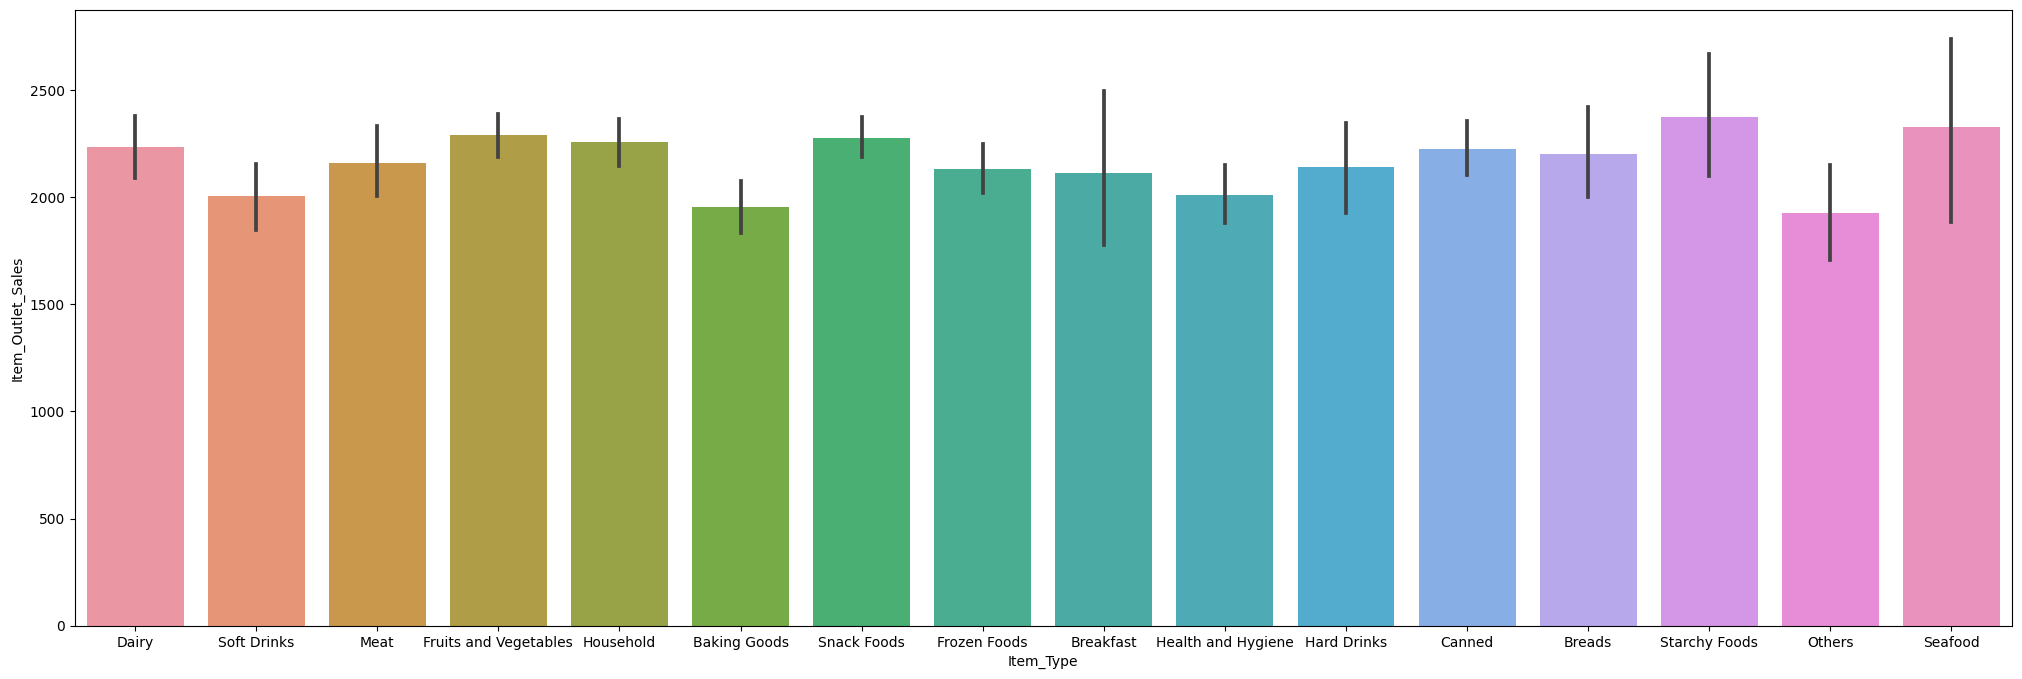

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,8))
sns.barplot(y = df.Item_Outlet_Sales, x = df.Item_Type)